***Habitos estudiantiles***

In [ ]:
# Importar modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# 1. Cargar dataset
df=pd.read_csv("/content/Student_Habits.csv", sep=',', low_memory=False)

In [ ]:
# 1. Revisar la estructura y primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
df.info()
print("\nDescripción estadística:")
print(df.describe(include='all'))

Primeras filas del dataset:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                


Valores faltantes por columna:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


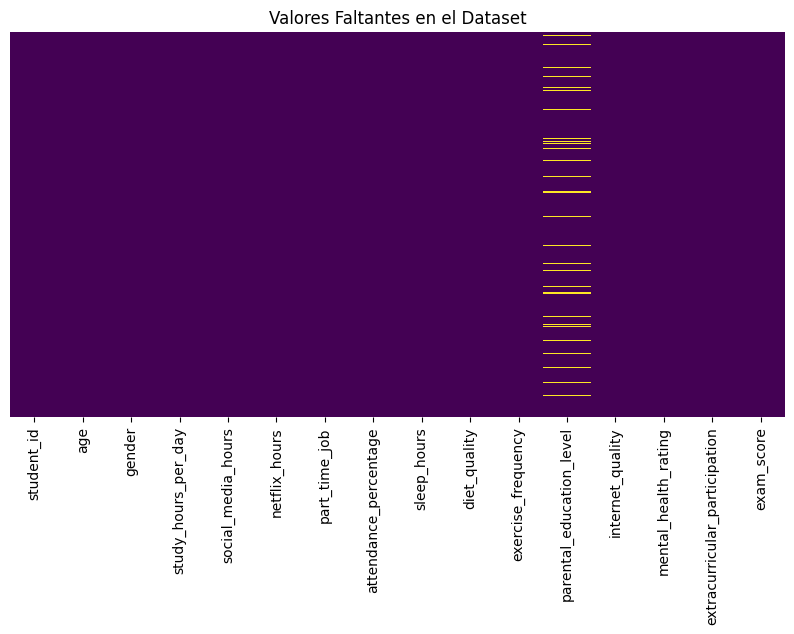

In [ ]:
# 2. Identificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de valores faltantes
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Valores Faltantes en el Dataset")
plt.show()

▶**Parental Education Level**, 91/1000 sin informacion. Posibilidades si llegamos a usar esa variable en el estudio
*   eliminamos las 91 filas en la base
*   Ponemos la categoria que mas frecuencia de aparicion tiene
  
    

In [ ]:

df["parental_education_level"].value_counts()


,count
parental_education_level,
High School,392
Bachelor,350
Master,167


,count
parental_education_level,
High School,392
Bachelor,350
Master,167


In [ ]:
#Eliminacion 91 Filas a pesar de no saber si vamos a usar la columna
df_filtrado = df[df["parental_education_level"].notna()]
print(df_filtrado.isnull().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
interne

In [ ]:
#Para una prueba pongo los null de parental Education en NULL y poder comparar que pasaria
df_null = df.copy()
df_null["parental_education_level"].fillna("NULL", inplace=True)

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


In [ ]:
df_filtrado.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#Indexae en funcion a alguna variable y Eliminar ID inecesarios y molestos para los modelos automaticos

In [ ]:
print(df_filtrado.describe(include='all'))

       student_id         age gender  study_hours_per_day  social_media_hours  \
count         909  909.000000    909           909.000000          909.000000   
unique        909         NaN      3                  NaN                 NaN   
top         S1999         NaN   Male                  NaN                 NaN   
freq            1         NaN    440                  NaN                 NaN   
mean          NaN   20.475248    NaN             3.538724            2.504620   
std           NaN    2.302721    NaN             1.469730            1.164802   
min           NaN   17.000000    NaN             0.000000            0.000000   
25%           NaN   18.000000    NaN             2.500000            1.700000   
50%           NaN   20.000000    NaN             3.500000            2.500000   
75%           NaN   22.000000    NaN             4.500000            3.300000   
max           NaN   24.000000    NaN             8.300000            7.200000   

        netflix_hours part_

▶*Comparando los DESCRIBE antes y despues de quitar las 91 entradas vacias, se denota que ninguna variable sufrio cambio*

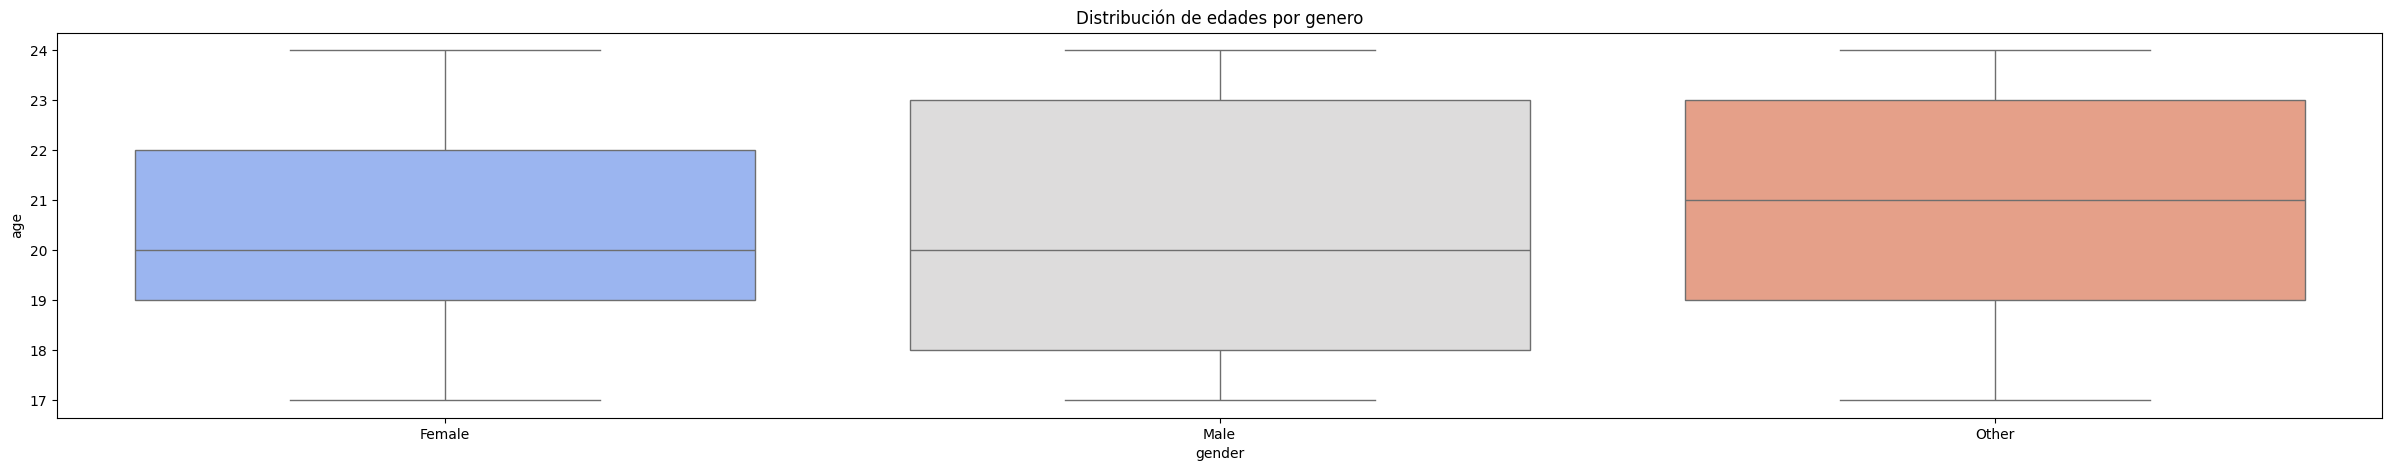

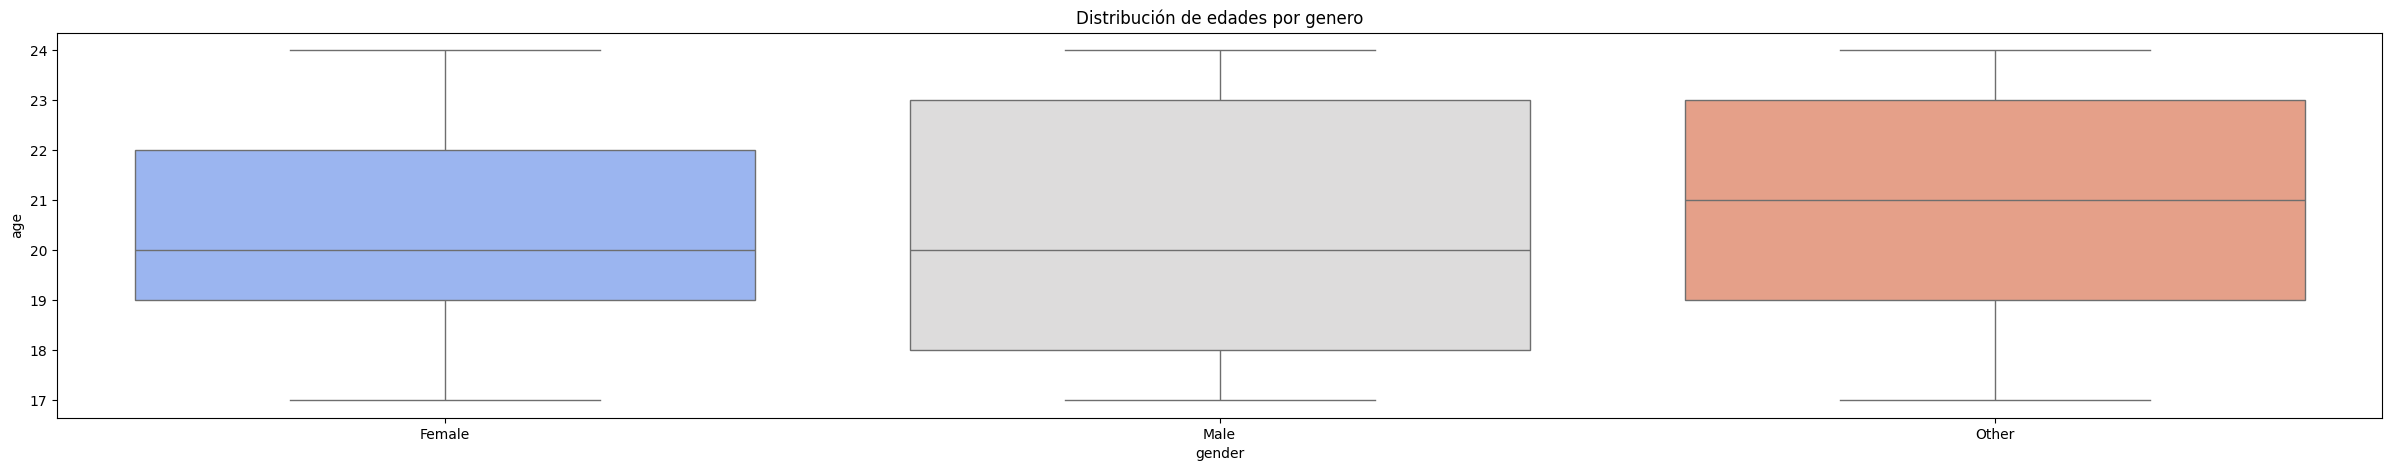

In [ ]:
# 4. Análisis Bivariado
plt.figure(figsize=(30, 5))
sns.boxplot(x='gender', y='age', data=df_filtrado, palette='coolwarm')
plt.title("Distribución de edades por genero")
plt.show()



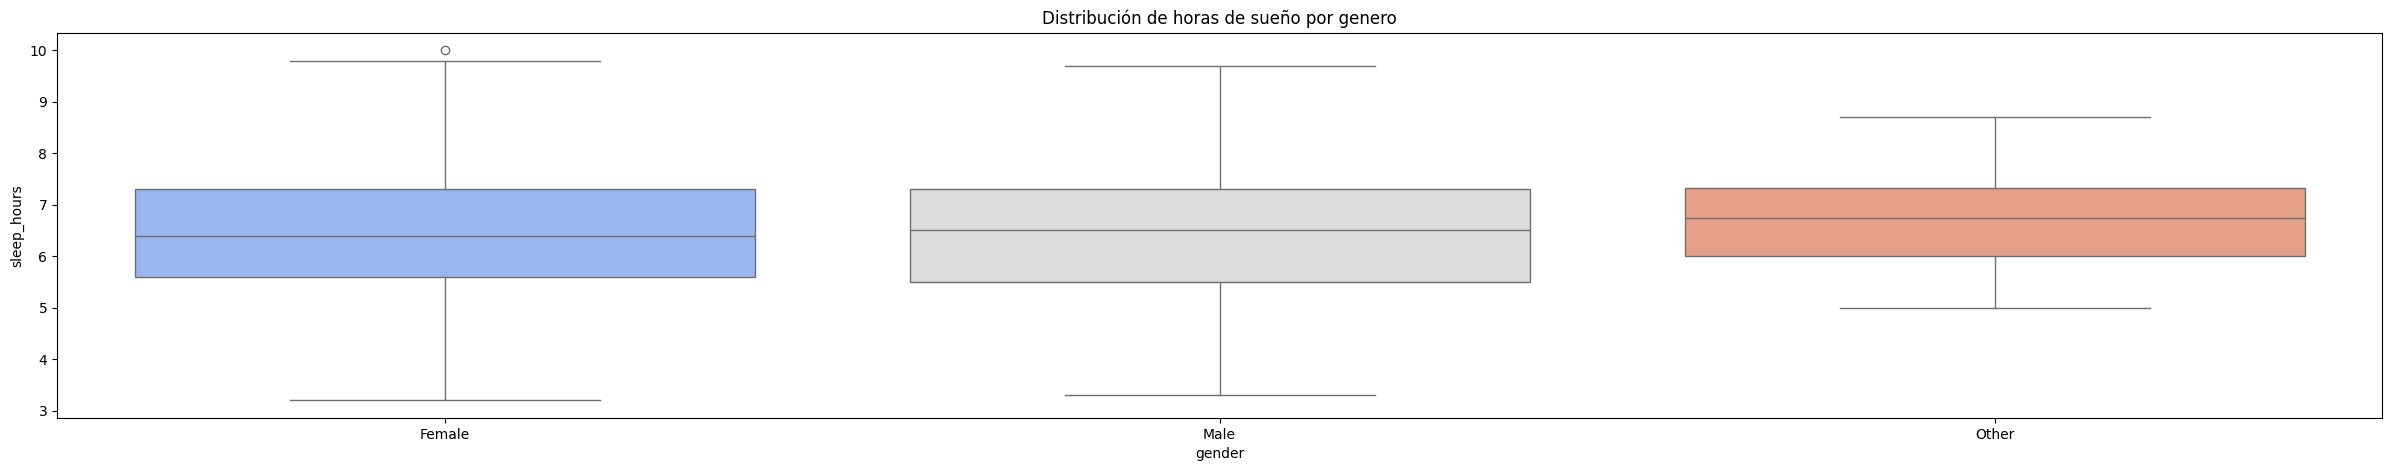

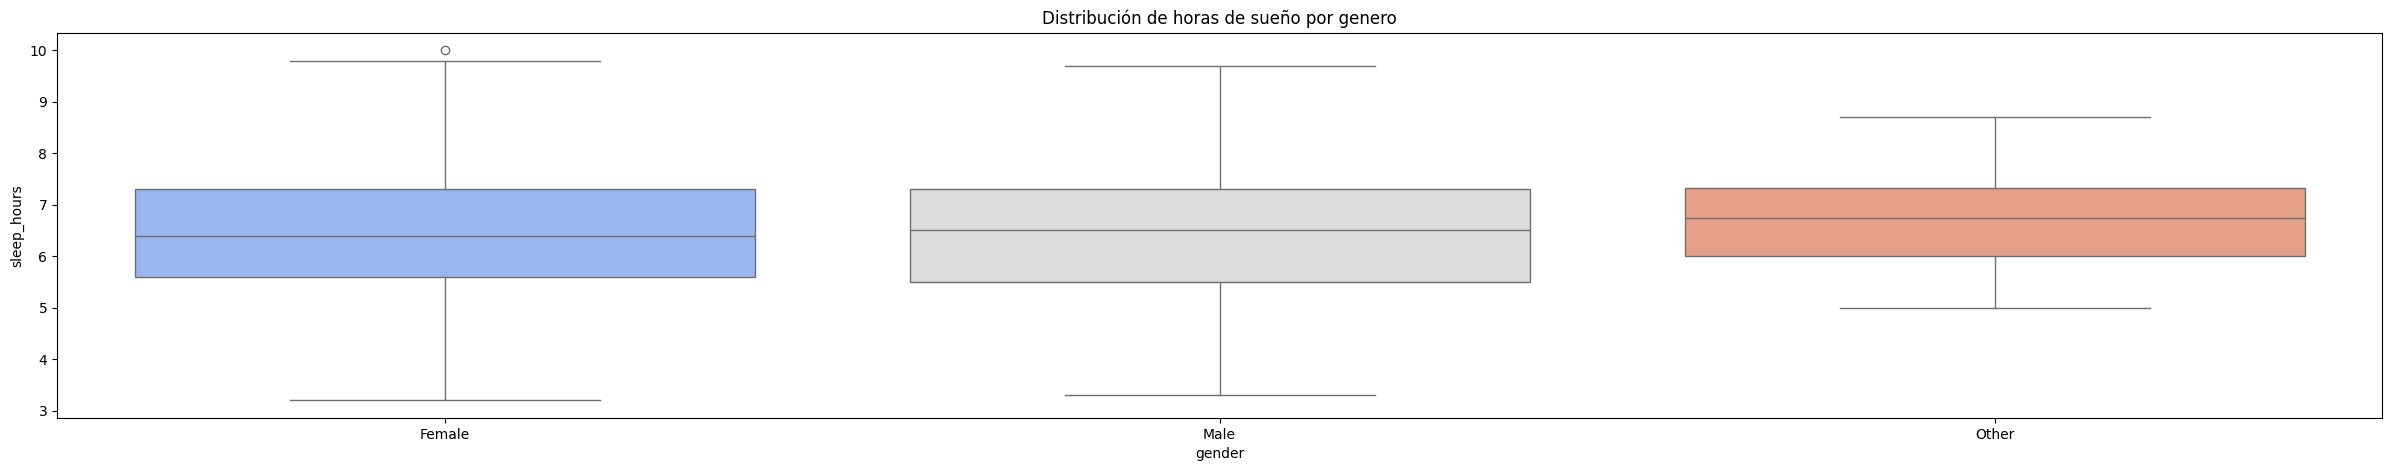

In [ ]:
# 4. Análisis Bivariado
plt.figure(figsize=(30, 5))
sns.boxplot(x='gender', y='sleep_hours', data=df_filtrado, palette='coolwarm')
plt.title("Distribución de horas de sueño por genero")
plt.show()


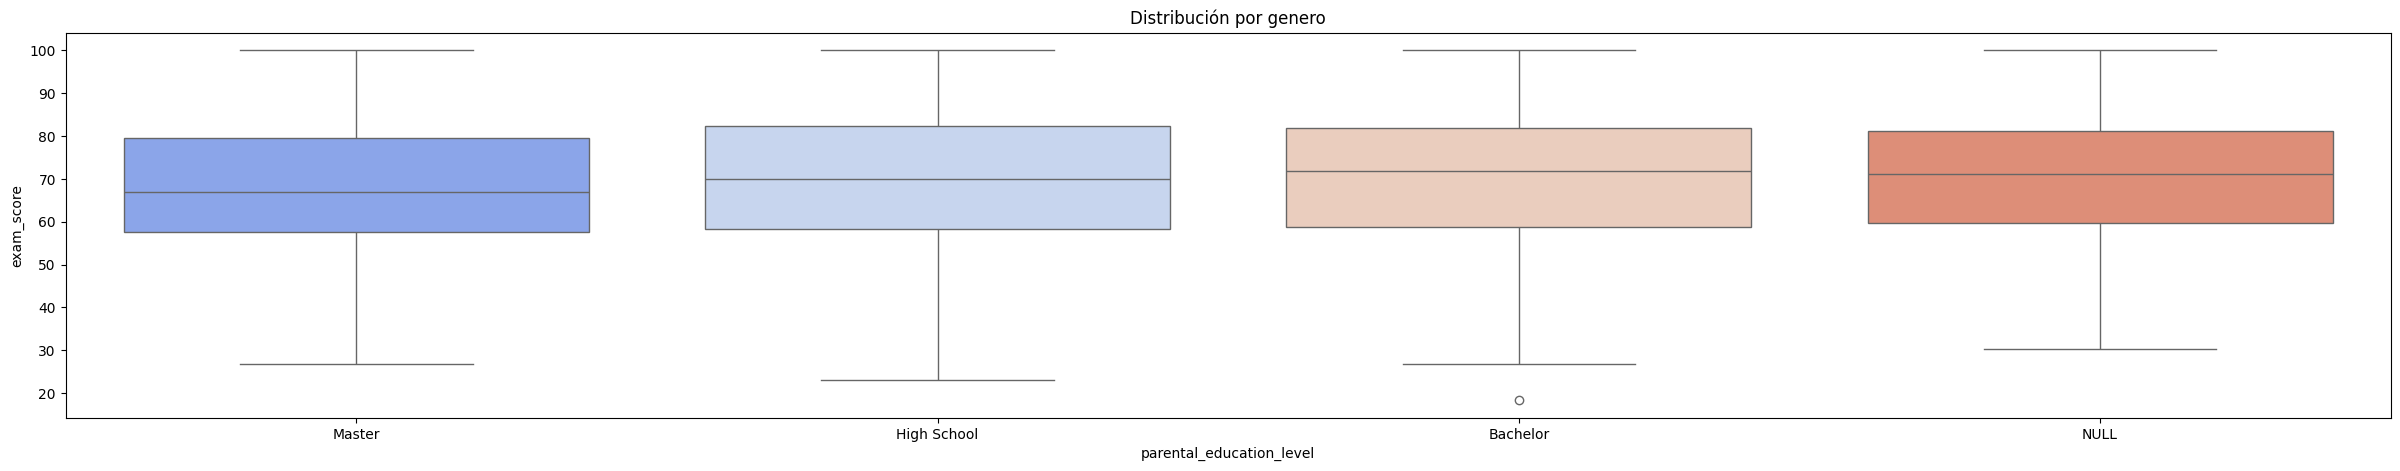

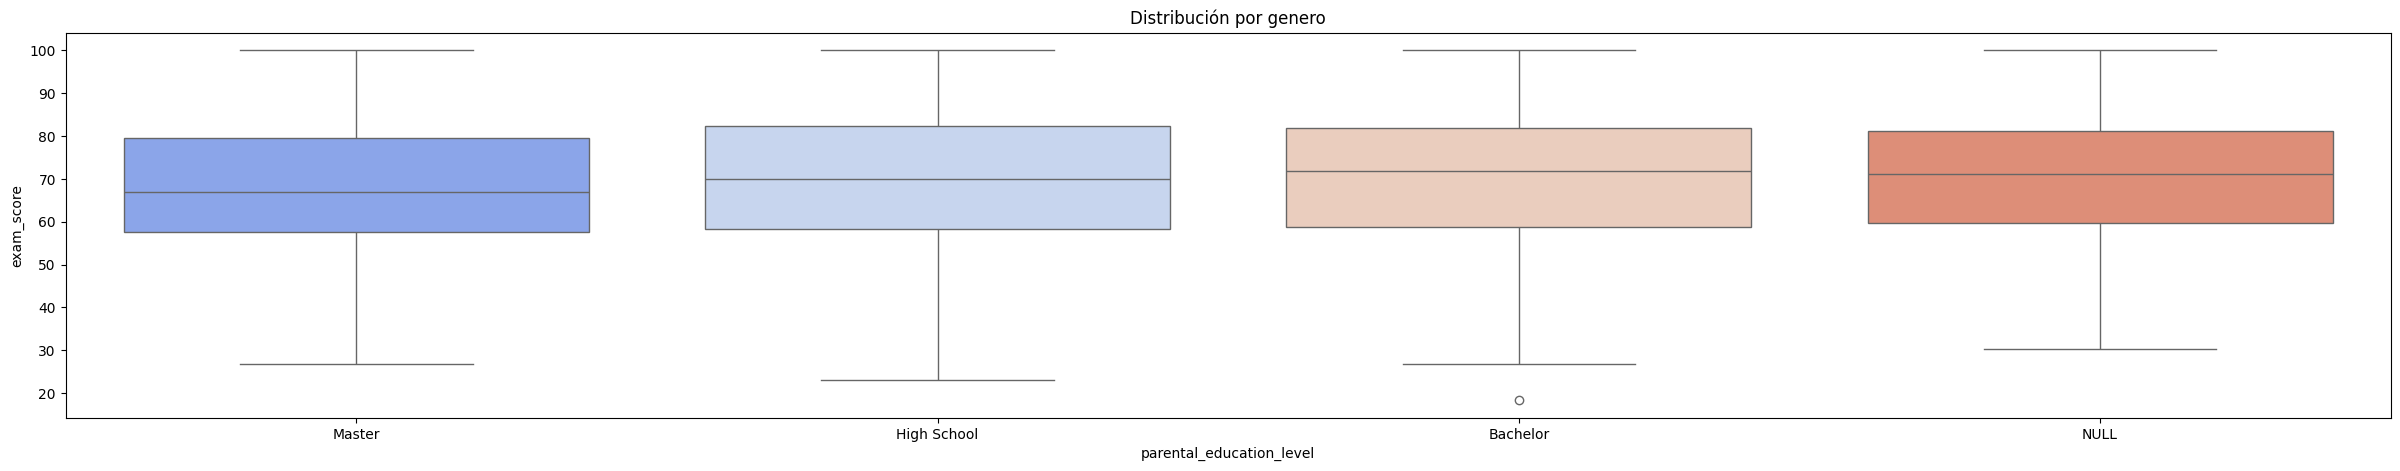

In [ ]:
# 4. Análisis Bivariado
plt.figure(figsize=(30, 5))
sns.boxplot(x='parental_education_level', y='exam_score', data=df_null, palette='coolwarm')
plt.title("Distribución por genero")
plt.show()

# Se asume que se quiere encontrar una relacion de las variables con respecto a la NOTA

Estudiemos como afectan las variables con respecto a la EXAM_SCORE

**Directamente Proporcional**
*   NUMERICAS:study_hours_per_day, attendance_percentage, sleep_hours, exercise_frequency, parental_education_level
*   CATEGORICAS: diet_quality(Good, Fair, Pour),


**Inversamente proporcional**
*   NUMERICAS: social_media_hours, netflix_hours, mental_health_rating
*   CATEGORICAS: part_time_job (yes)

  
**Invariable**
*   NUMERICAS: Age, gender
*   CATEGORICAS: internet_quality, extracurricular_participation

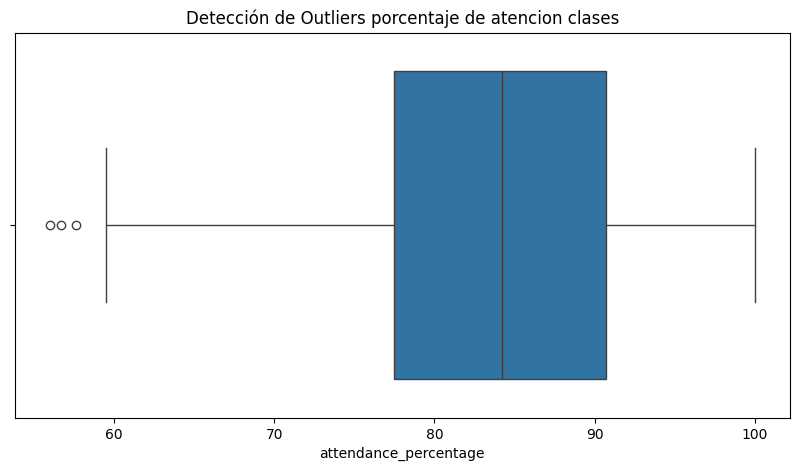

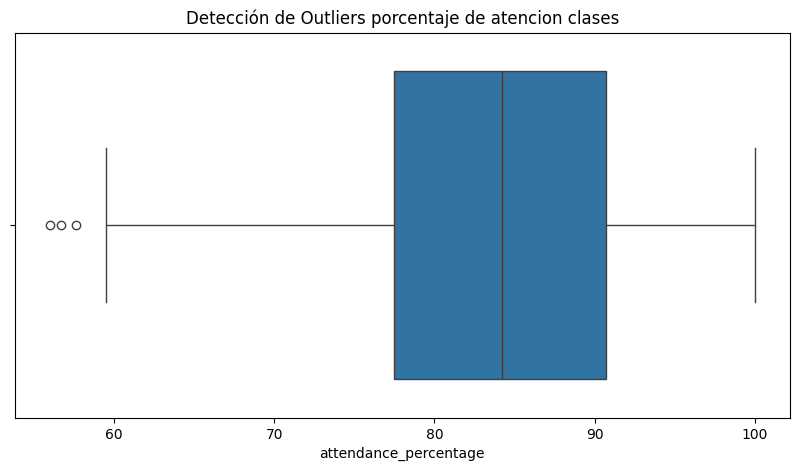

In [ ]:
# 5. Identificación de Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtrado['attendance_percentage'])
plt.title("Detección de Outliers porcentaje de atencion clases")
plt.show()

In [ ]:
# 8. Eliminación o transformación de outliers
Q1 = df_filtrado["attendance_percentage"].quantile(0.25)
Q3 = df_filtrado["attendance_percentage"].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
#visualizamos Outlayers. podrian exluirse al no afectar los promedios ademas de ser extremadamente pocos
df_filtrado[df_filtrado['attendance_percentage']<Q1-1.5*IQR]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
651,S1651,24,Female,3.7,1.7,2.3,Yes,57.6,6.2,Good,0,Master,Average,7,No,75.7
706,S1706,20,Female,5.0,1.5,2.2,No,56.7,5.5,Poor,2,Master,Average,4,No,83.6
971,S1971,23,Female,3.5,2.5,1.8,No,56.0,6.1,Good,5,High School,Average,6,No,64.5


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
651,S1651,24,Female,3.7,1.7,2.3,Yes,57.6,6.2,Good,0,Master,Average,7,No,75.7
706,S1706,20,Female,5.0,1.5,2.2,No,56.7,5.5,Poor,2,Master,Average,4,No,83.6
971,S1971,23,Female,3.5,2.5,1.8,No,56.0,6.1,Good,5,High School,Average,6,No,64.5


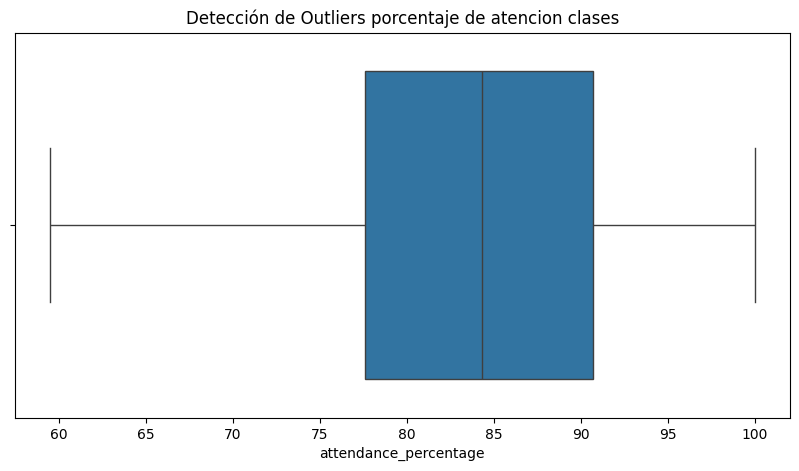

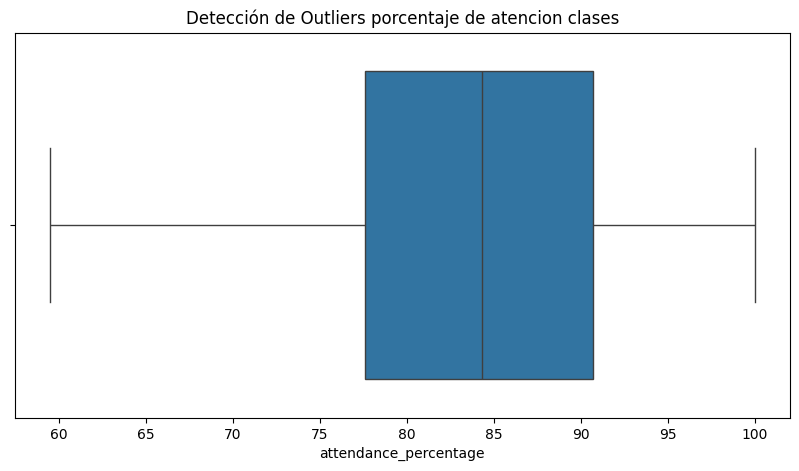

In [ ]:
#elimino outliers VUELVO A VISUALIZAR RESULTADO
df_sin_Outliers_1=df_filtrado[df_filtrado['attendance_percentage']>Q1-1.5*IQR]

# vALIDAR QUE ELIMINAMOS OTLAYERS QUE QUE NO VARIARON LOS VALORES
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_sin_Outliers_1['attendance_percentage'])
plt.title("Detección de Outliers porcentaje de atencion clases")
plt.show()

In [ ]:
# ALGO PASO QUE CAMBIO NOTORIAMENTE LOS PORCENTAJES DE ATENCION        correccion de error
df_sin_Outliers_1.describe(include='all')

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,906,906.000000,906,906.000000,906.000000,906.000000,906,906.000000,906.000000,906,906.000000,906,906,906.000000,906,906.000000
unique,906,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,440,NaN,NaN,NaN,711,NaN,NaN,396,NaN,391,410,NaN,617,NaN
mean,NaN,20.469095,NaN,3.536976,2.506623,1.829470,NaN,83.970088,6.475828,NaN,3.054084,NaN,NaN,5.465784,NaN,69.541501
std,NaN,2.301965,NaN,1.471351,1.165944,1.072841,NaN,9.339206,1.220434,NaN,2.035147,NaN,NaN,2.861333,NaN,16.948976
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.600000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.300000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.400000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.700000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.300000


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,906,906.000000,906,906.000000,906.000000,906.000000,906,906.000000,906.000000,906,906.000000,906,906,906.000000,906,906.000000
unique,906,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,440,NaN,NaN,NaN,711,NaN,NaN,396,NaN,391,410,NaN,617,NaN
mean,NaN,20.469095,NaN,3.536976,2.506623,1.829470,NaN,83.970088,6.475828,NaN,3.054084,NaN,NaN,5.465784,NaN,69.541501
std,NaN,2.301965,NaN,1.471351,1.165944,1.072841,NaN,9.339206,1.220434,NaN,2.035147,NaN,NaN,2.861333,NaN,16.948976
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.600000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.300000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.400000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.700000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.300000


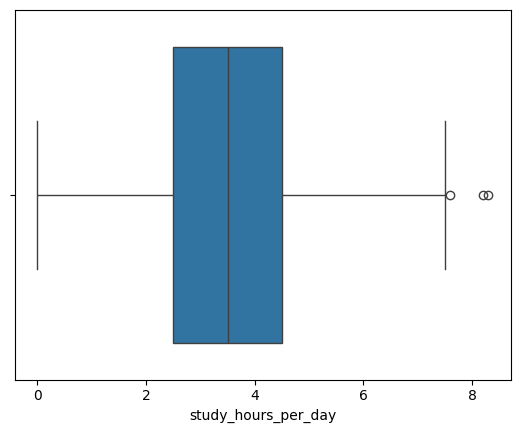

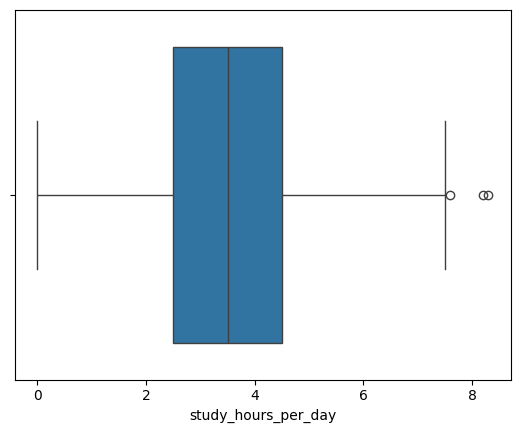

In [ ]:
# 7. Detección y tratamiento de outliers en age
sns.boxplot(x=df_sin_Outliers_1["study_hours_per_day"])
plt.show()

In [ ]:
#Todo el ciclo de Filtrado de Outliers
Q1 = df_sin_Outliers_1["study_hours_per_day"].quantile(0.25)
Q3 = df_sin_Outliers_1["study_hours_per_day"].quantile(0.75)
IQR = Q3 - Q1
#elimino outliers VUELVO A VISUALIZAR RESULTADO
df_sin_Outliers_2=df_sin_Outliers_1[df_sin_Outliers_1['study_hours_per_day']<Q3+1.5*IQR]

# describe para ver que sigue toddo bien
df_sin_Outliers_2.describe(include='all')

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,902,902.000000,902,902.000000,902.000000,902.000000,902,902.000000,902.000000,902,902.000000,902,902,902.000000,902,902.000000
unique,902,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,438,NaN,NaN,NaN,709,NaN,NaN,394,NaN,389,408,NaN,614,NaN
mean,NaN,20.472284,NaN,3.517627,2.504324,1.827716,NaN,83.948891,6.477051,NaN,3.053215,NaN,NaN,5.467849,NaN,69.406430
std,NaN,2.303018,NaN,1.445353,1.167500,1.074261,NaN,9.345087,1.220794,NaN,2.033418,NaN,NaN,2.862860,NaN,16.864348
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.600000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.250000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.250000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.700000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.100000


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,902,902.000000,902,902.000000,902.000000,902.000000,902,902.000000,902.000000,902,902.000000,902,902,902.000000,902,902.000000
unique,902,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,438,NaN,NaN,NaN,709,NaN,NaN,394,NaN,389,408,NaN,614,NaN
mean,NaN,20.472284,NaN,3.517627,2.504324,1.827716,NaN,83.948891,6.477051,NaN,3.053215,NaN,NaN,5.467849,NaN,69.406430
std,NaN,2.303018,NaN,1.445353,1.167500,1.074261,NaN,9.345087,1.220794,NaN,2.033418,NaN,NaN,2.862860,NaN,16.864348
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.600000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.250000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.250000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.700000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.100000


In [ ]:
#Todo el ciclo de Filtrado de Outliers
Q1 = df_sin_Outliers_2["social_media_hours"].quantile(0.25)
Q3 = df_sin_Outliers_2["social_media_hours"].quantile(0.75)
IQR = Q3 - Q1
#elimino outliers VUELVO A VISUALIZAR RESULTADO
df_sin_Outliers=df_sin_Outliers_2[df_sin_Outliers_2['social_media_hours']<Q3+1.5*IQR]

# describe para ver que sigue toddo bien
df_sin_Outliers.describe(include='all')

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,898,898.000000,898,898.000000,898.000000,898.000000,898,898.000000,898.000000,898,898.000000,898,898,898.000000,898,898.000000
unique,898,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,434,NaN,NaN,NaN,707,NaN,NaN,393,NaN,387,406,NaN,612,NaN
mean,NaN,20.477728,NaN,3.516370,2.487639,1.830178,NaN,83.921604,6.479510,NaN,3.051225,NaN,NaN,5.466592,NaN,69.400000
std,NaN,2.303614,NaN,1.447748,1.142301,1.072517,NaN,9.353067,1.221164,NaN,2.034168,NaN,NaN,2.864362,NaN,16.880151
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.525000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.150000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.150000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.675000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.100000


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,898,898.000000,898,898.000000,898.000000,898.000000,898,898.000000,898.000000,898,898.000000,898,898,898.000000,898,898.000000
unique,898,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Male,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,434,NaN,NaN,NaN,707,NaN,NaN,393,NaN,387,406,NaN,612,NaN
mean,NaN,20.477728,NaN,3.516370,2.487639,1.830178,NaN,83.921604,6.479510,NaN,3.051225,NaN,NaN,5.466592,NaN,69.400000
std,NaN,2.303614,NaN,1.447748,1.142301,1.072517,NaN,9.353067,1.221164,NaN,2.034168,NaN,NaN,2.864362,NaN,16.880151
min,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,59.500000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.000000,NaN,2.500000,1.700000,1.000000,NaN,77.525000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.400000
50%,NaN,20.000000,NaN,3.500000,2.500000,1.800000,NaN,84.150000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.150000
75%,NaN,22.000000,NaN,4.500000,3.300000,2.600000,NaN,90.675000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.100000


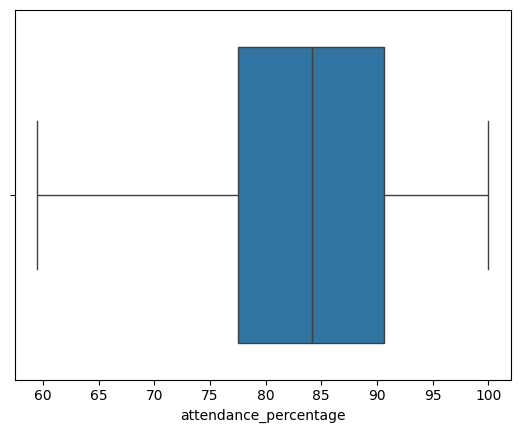

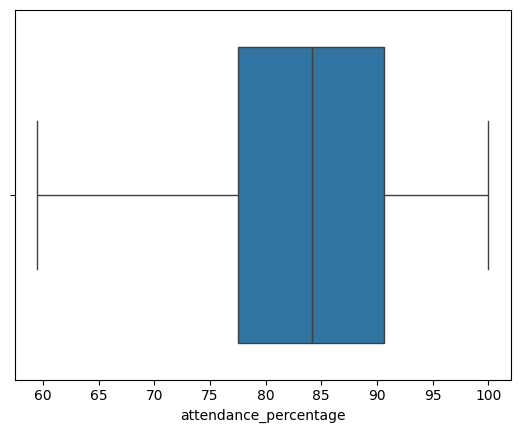

In [ ]:
# 7. Detección y tratamiento de outliers en age
sns.boxplot(x=df_sin_Outliers["attendance_percentage"])
plt.show()

In [ ]:
# 10. Creación de nuevas variables:
df_sin_Outliers["social+netflix"] = df_sin_Outliers["social_media_hours"] + df_sin_Outliers["netflix_hours"]

In [ ]:
# 9. Normalización y estandarización
# Normalización Min-Max:**
scaler = MinMaxScaler()
df_sin_Outliers["age_norm"] = scaler.fit_transform(df_sin_Outliers[["age"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["study_hours_per_day_std"] = scaler.fit_transform(df_sin_Outliers[["study_hours_per_day"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["social_media_hours_std"] = scaler.fit_transform(df_sin_Outliers[["social_media_hours"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["netflix_hours_std"] = scaler.fit_transform(df_sin_Outliers[["netflix_hours"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["netflix_hours_std"] = scaler.fit_transform(df_sin_Outliers[["netflix_hours"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["sleep_hours_std"] = scaler.fit_transform(df_sin_Outliers[["sleep_hours"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["exercise_frequency_std"] = scaler.fit_transform(df_sin_Outliers[["exercise_frequency"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["mental_health_rating_std"] = scaler.fit_transform(df_sin_Outliers[["mental_health_rating"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["attendance_percentage_std"] = scaler.fit_transform(df_sin_Outliers[["attendance_percentage"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["exam_score_std"] = scaler.fit_transform(df_sin_Outliers[["exam_score"]])

# Estandarización (Z-score):
scaler = StandardScaler()
df_sin_Outliers["social+netflix_std"] = scaler.fit_transform(df_sin_Outliers[["social+netflix"]])

In [ ]:
# 10. Borrado Variables:
df_sin_Outliers = df_sin_Outliers.drop(["social+netflix", "student_id","exam_score", "attendance_percentage", "age", "study_hours_per_day", "social_media_hours_std", "netflix_hours_std", "social_media_hours", "netflix_hours", "sleep_hours", "exercise_frequency", "mental_health_rating"], axis=1)


In [ ]:
# Conversión de variables categóricas
df_sin_Outliers = pd.get_dummies(df_sin_Outliers, columns=['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation'], drop_first=True)

In [ ]:
# 11. Cálculo de la matriz de correlación:
# Seleccionar solo las columnas numéricas
numeric_df = df_sin_Outliers.select_dtypes(include=['number'])

# Calcular la matriz de correlación   LAS NO NUMERICAS SE EXCLUYEN ANTES
corr_matrix = numeric_df.corr()
print(corr_matrix)

                           age_norm  study_hours_per_day_std  sleep_hours_std  \
age_norm                   1.000000                 0.012361         0.041608   
study_hours_per_day_std    0.012361                 1.000000        -0.023110   
sleep_hours_std            0.041608                -0.023110         1.000000   
exercise_frequency_std    -0.003563                -0.026632         0.026857   
mental_health_rating_std  -0.053249                -0.014210        -0.008291   
attendance_percentage_std -0.019050                 0.025669         0.000281   
exam_score_std            -0.009888                 0.821479         0.126904   
social+netflix_std        -0.005097                -0.012407         0.010692   

                           exercise_frequency_std  mental_health_rating_std  \
age_norm                                -0.003563                 -0.053249   
study_hours_per_day_std                 -0.026632                 -0.014210   
sleep_hours_std                  

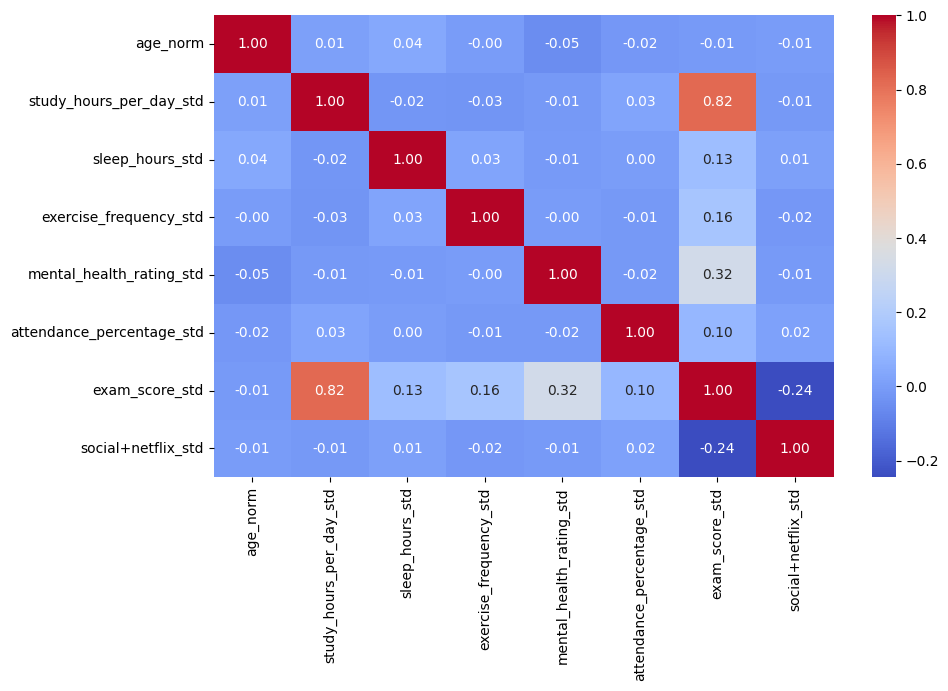

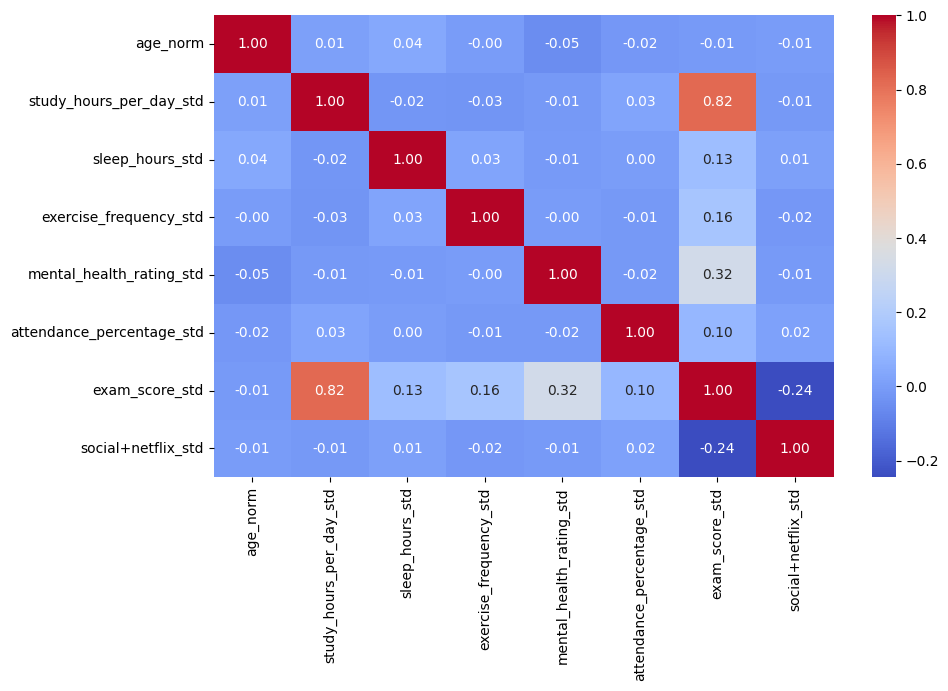

In [ ]:
# 12. Visualización con un heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# 13. Resumen estadístico de los datos:
print(df_sin_Outliers.describe())

         age_norm  study_hours_per_day_std  sleep_hours_std  \
count  898.000000             8.980000e+02     8.980000e+02   
mean     0.496818             2.433095e-16    -4.510126e-16   
std      0.329088             1.000557e+00     1.000557e+00   
min      0.000000            -2.430208e+00    -2.687058e+00   
25%      0.142857            -7.024261e-01    -7.206242e-01   
50%      0.428571            -1.131332e-02     1.678841e-02   
75%      0.714286             6.797995e-01     6.722663e-01   
max      1.000000             2.684027e+00     2.884504e+00   

       exercise_frequency_std  mental_health_rating_std  \
count            8.980000e+02              8.980000e+02   
mean            -1.285782e-17              9.495003e-17   
std              1.000557e+00              1.000557e+00   
min             -1.500822e+00             -1.560236e+00   
25%             -1.008947e+00             -8.616115e-01   
50%             -2.519629e-02             -1.629865e-01   
75%              9.

<Figure size 1200x600 with 0 Axes>

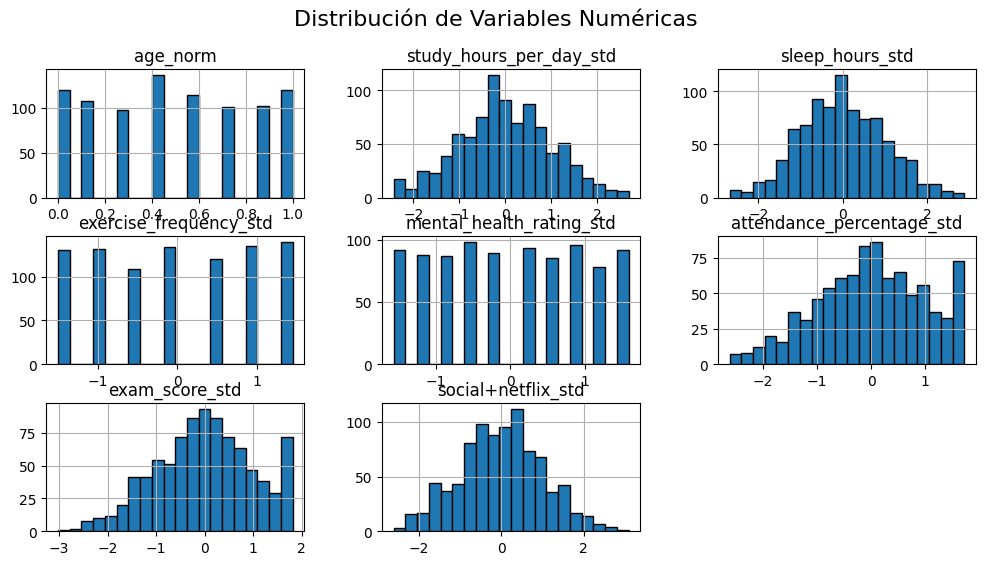

EDA finalizado.


<Figure size 1200x600 with 0 Axes>

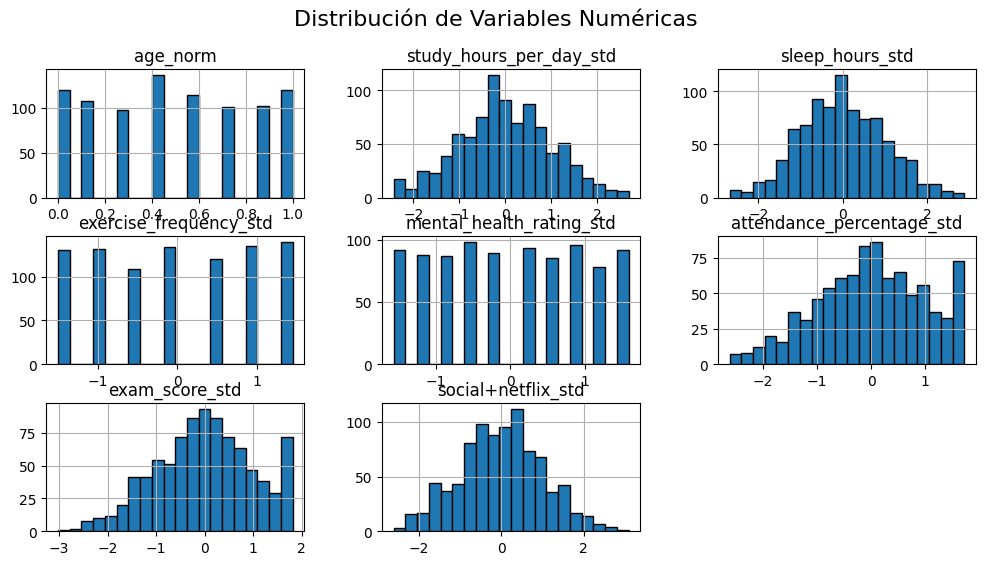

EDA finalizado.


In [ ]:
# 15. Distribución de Variables Numéricas
plt.figure(figsize=(12, 6))
df_sin_Outliers.hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

print("EDA finalizado.")

In [ ]:

sns.pairplot(df_sin_Outliers, hue='exam_score_std')

Output hidden; open in https://colab.research.google.com to view.